<a href="https://colab.research.google.com/github/lorenzrossi/AMD-ComicsFaces/blob/main/AMD_models_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from os import listdir
import pandas as pd
# Basic packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

# Image preprocessing
import pathlib
import PIL
import PIL.Image
import cv2

# Neural Networks
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical, load_img, img_to_array
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, callbacks, regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, Activation
from keras.optimizers import Adam, SGD, RMSprop
from keras.losses import binary_crossentropy
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

# Cross Validation
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss

tfk = tf.keras
tf.keras.backend.set_floatx("float64")


from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/MyDrive/ComicsFaces'

Mounted at /content/drive


In [2]:
X = pickle.load(open('/content/drive/MyDrive/ComicsFaces/Pickles/X.pickle','rb'))
y = pickle.load(open('/content/drive/MyDrive/ComicsFaces/Pickles/y.pickle','rb'))

pics_classes = ['comics','faces']

images_to_plot = 8

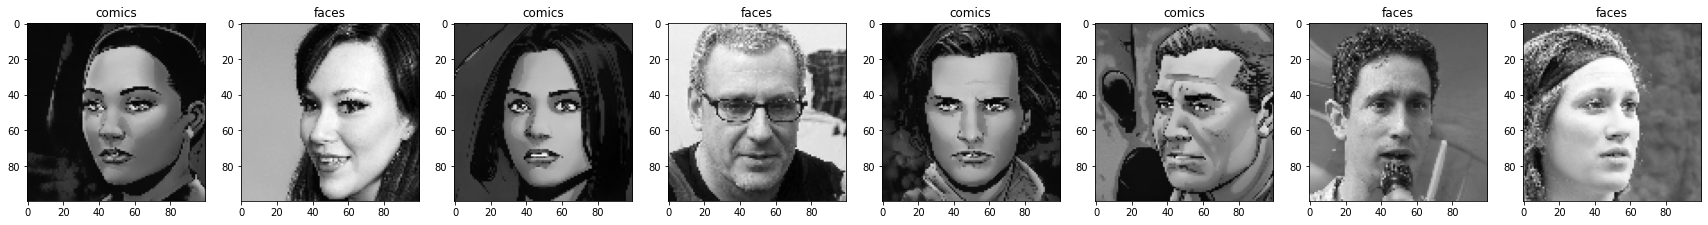

In [3]:
f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(30, 20)

gray_channel = 0

for i in range(images_to_plot):
  gray_image = X[i][:, :, gray_channel]
  ax[i].imshow(gray_image, cmap = "gray")
  numeric_label = y[i]
  ax[i].set_title(pics_classes[numeric_label])

In [4]:
number_of_classes = len(pics_classes)

In [5]:
x_size, img_dim = X.shape[0], X.shape[1]

# rescale in [0,1]
X = tf.cast(X, tf.float32) / 255.0

# one hot encoding
depth = 1
y = tf.reshape(tf.one_hot(y, depth), shape = [x_size, depth])

In [6]:
# Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [7]:
# Hyperparameters
epoch = 40 # n of epochs
batch = 128 # batch size

# Defining the loss
loss = keras.losses.BinaryCrossentropy(from_logits = True)

# Defining the optimizer(s)
op_1 = Adam()
op_2 = SGD(learning_rate=0.01, momentum=0.9, decay=0.01/50)
op_3 = RMSprop(learning_rate=1e-3)

In [8]:
# Defining plots
legend_size = 14

def performance_plot(history):
    plt.figure(figsize=(20,8))

    # Loss plots
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','test'], fontsize = legend_size)

    # Accuracy plots
    plt.subplot(1,2,2)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.ylabel('accuracy', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','val'], fontsize = legend_size)

    plt.show()

# TRAINING MODEL 1

In [9]:
model1 = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
        layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
        layers.MaxPooling2D(pool_size = (2, 2)),
        layers.Flatten(),
        layers.Dense(128, use_bias=False, activation='relu'),
        layers.Dense(1, activation = 'sigmoid')
        ])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      288       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 80000)             0         
                                                                 
 dense (Dense)               (None, 128)               10240000  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

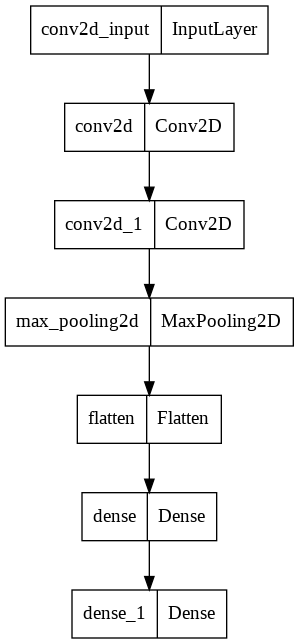

In [10]:
keras.utils.plot_model(model1, 'model.png')

Epoch 1/40


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 15s 37ms/step - loss: 0.1081 - binary_accuracy: 0.9631 - val_loss: 0.0049 - val_binary_accuracy: 0.9994
Epoch 2/40
100/100 [==============================] - 4s 35ms/step - loss: 0.0021 - binary_accuracy: 0.9996 - val_loss: 0.0019 - val_binary_accuracy: 0.9997
Epoch 3/40
100/100 [==============================] - 4s 35ms/step - loss: 5.7563e-04 - binary_accuracy: 1.0000 - val_loss: 0.0021 - val_binary_accuracy: 0.9997
Epoch 4/40
100/100 [==============================] - 4s 35ms/step - loss: 2.1653e-04 - binary_accuracy: 1.0000 - val_loss: 0.0017 - val_binary_accuracy: 0.9997
Epoch 5/40
100/100 [==============================] - 4s 35ms/step - loss: 1.1470e-04 - binary_accuracy: 1.0000 - val_loss: 0.0014 - val_binary_accuracy: 0.9997
Epoch 6/40
100/100 [==============================] - 4s 35ms/step - loss: 7.0742e-05 - binary_accuracy: 1.0000 - val_loss: 0.0015 - val_binary_accuracy: 0.9997
Epoch 7/40
100/100 [==============================] 

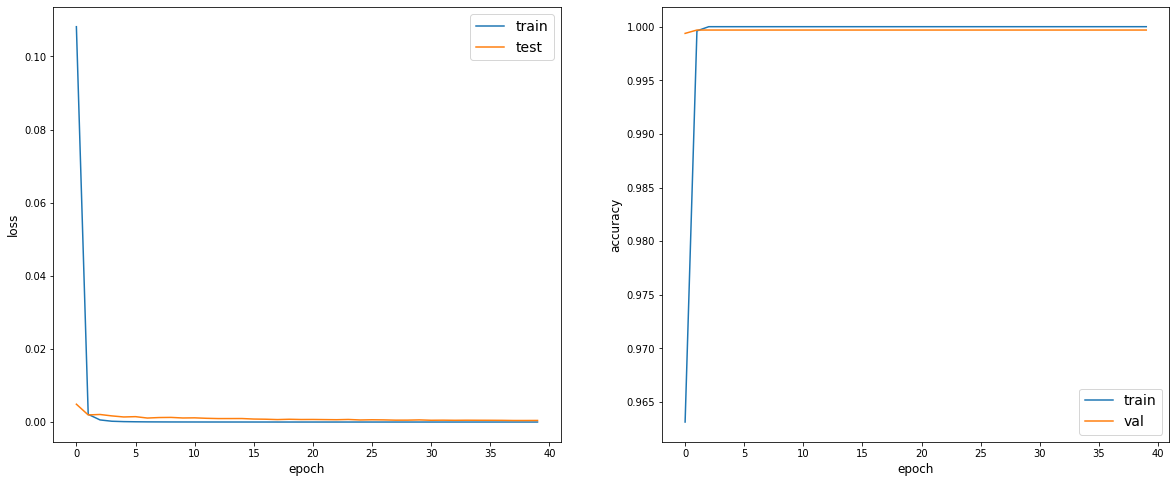

125/125 [==============================] - 1s 6ms/step - loss: 0.0050 - binary_accuracy: 0.9992
test loss, test acc: [0.004966828082659508, 0.99925]


In [11]:
# compiling the model
model1.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model1.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_1 = model1.evaluate(X_test, y_test)
print("test loss, test acc:", result_1)

# TRAINING MODEL 2

In [12]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      288       
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 40000)            

Epoch 1/40
100/100 [==============================] - 5s 45ms/step - loss: 0.1485 - binary_accuracy: 0.9572 - val_loss: 0.0058 - val_binary_accuracy: 0.9984
Epoch 2/40
100/100 [==============================] - 4s 43ms/step - loss: 0.0056 - binary_accuracy: 0.9980 - val_loss: 0.0050 - val_binary_accuracy: 0.9984
Epoch 3/40
100/100 [==============================] - 4s 43ms/step - loss: 0.0017 - binary_accuracy: 0.9995 - val_loss: 0.0040 - val_binary_accuracy: 0.9991
Epoch 4/40
100/100 [==============================] - 4s 43ms/step - loss: 0.0019 - binary_accuracy: 0.9993 - val_loss: 0.0033 - val_binary_accuracy: 0.9994
Epoch 5/40
100/100 [==============================] - 4s 43ms/step - loss: 3.3109e-04 - binary_accuracy: 1.0000 - val_loss: 0.0028 - val_binary_accuracy: 0.9991
Epoch 6/40
100/100 [==============================] - 4s 43ms/step - loss: 9.3391e-05 - binary_accuracy: 1.0000 - val_loss: 0.0028 - val_binary_accuracy: 0.9991
Epoch 7/40
100/100 [==============================

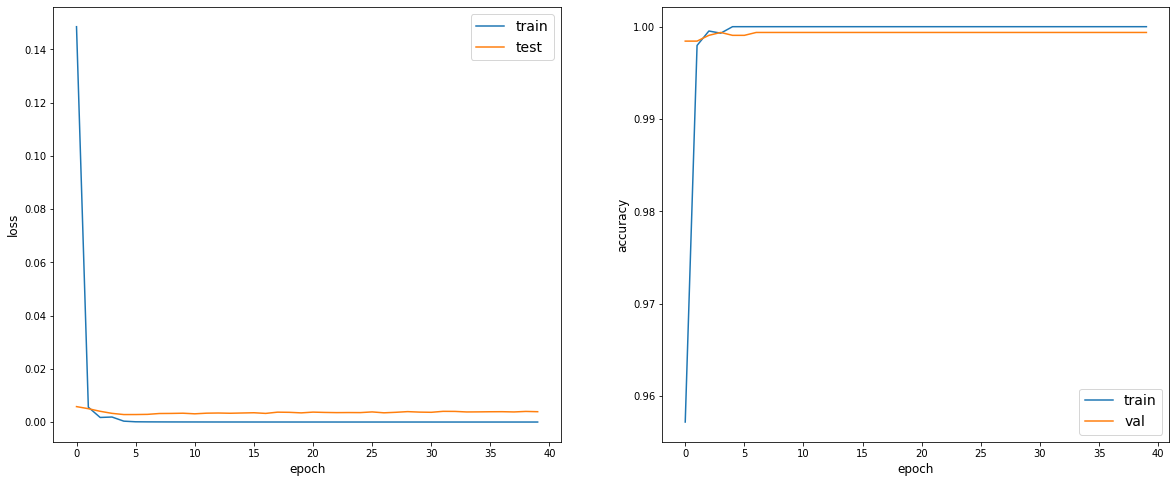

125/125 [==============================] - 1s 7ms/step - loss: 0.0057 - binary_accuracy: 0.9990
test loss, test acc: [0.005696549437932799, 0.999]


In [13]:
# compiling the model
model2.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model2.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_2 = model2.evaluate(X_test, y_test)
print("test loss, test acc:", result_2)

# TRAINING MODEL 3

In [14]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      288       
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 128)      

Epoch 1/40
100/100 [==============================] - 6s 50ms/step - loss: 0.1525 - binary_accuracy: 0.9373 - val_loss: 0.0272 - val_binary_accuracy: 0.9906
Epoch 2/40
100/100 [==============================] - 5s 49ms/step - loss: 0.0144 - binary_accuracy: 0.9949 - val_loss: 0.0118 - val_binary_accuracy: 0.9966
Epoch 3/40
100/100 [==============================] - 5s 49ms/step - loss: 0.0055 - binary_accuracy: 0.9979 - val_loss: 0.0087 - val_binary_accuracy: 0.9978
Epoch 4/40
100/100 [==============================] - 5s 49ms/step - loss: 0.0041 - binary_accuracy: 0.9982 - val_loss: 0.0068 - val_binary_accuracy: 0.9969
Epoch 5/40
100/100 [==============================] - 5s 49ms/step - loss: 0.0015 - binary_accuracy: 0.9996 - val_loss: 0.0058 - val_binary_accuracy: 0.9978
Epoch 6/40
100/100 [==============================] - 5s 49ms/step - loss: 0.0014 - binary_accuracy: 0.9996 - val_loss: 0.0054 - val_binary_accuracy: 0.9984
Epoch 7/40
100/100 [==============================] - 5s 4

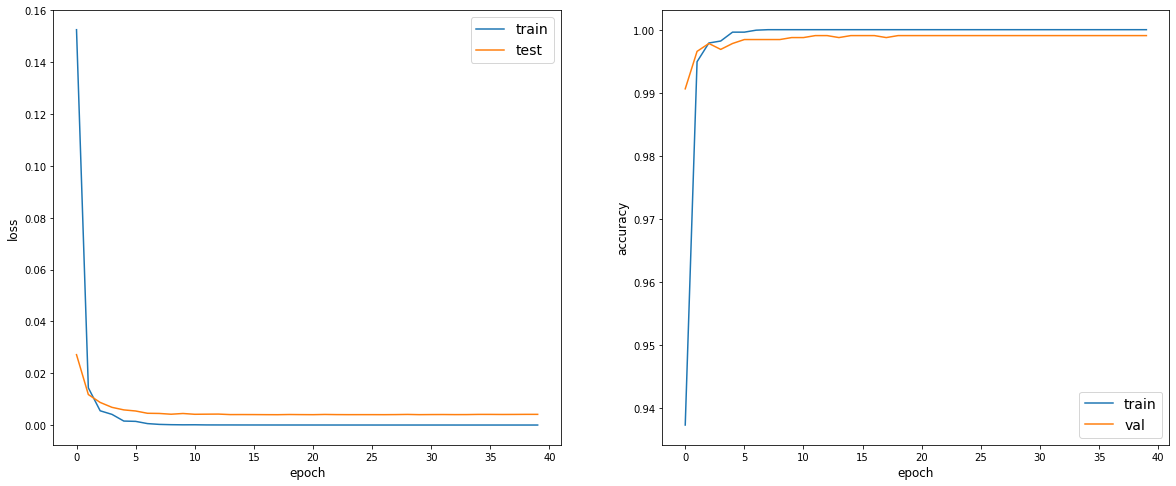

125/125 [==============================] - 1s 7ms/step - loss: 0.0024 - binary_accuracy: 0.9992
test loss, test acc: [0.0024243109730440558, 0.99925]


In [15]:
# compiling the model
model3.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model3.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_3 = model3.evaluate(X_test, y_test)
print("test loss, test acc:", result_3)

# TRAINING MODEL 4

In [16]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      288       
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 25, 25, 128)      

Epoch 1/40
100/100 [==============================] - 6s 56ms/step - loss: 0.2854 - binary_accuracy: 0.8899 - val_loss: 0.0237 - val_binary_accuracy: 0.9916
Epoch 2/40
100/100 [==============================] - 5s 54ms/step - loss: 0.0137 - binary_accuracy: 0.9951 - val_loss: 0.0177 - val_binary_accuracy: 0.9944
Epoch 3/40
100/100 [==============================] - 5s 54ms/step - loss: 0.0076 - binary_accuracy: 0.9972 - val_loss: 0.0079 - val_binary_accuracy: 0.9981
Epoch 4/40
100/100 [==============================] - 5s 54ms/step - loss: 0.0044 - binary_accuracy: 0.9984 - val_loss: 0.0043 - val_binary_accuracy: 0.9984
Epoch 5/40
100/100 [==============================] - 5s 54ms/step - loss: 0.0019 - binary_accuracy: 0.9995 - val_loss: 0.0045 - val_binary_accuracy: 0.9988
Epoch 6/40
100/100 [==============================] - 5s 54ms/step - loss: 0.0019 - binary_accuracy: 0.9995 - val_loss: 0.0024 - val_binary_accuracy: 0.9994
Epoch 7/40
100/100 [==============================] - 5s 5

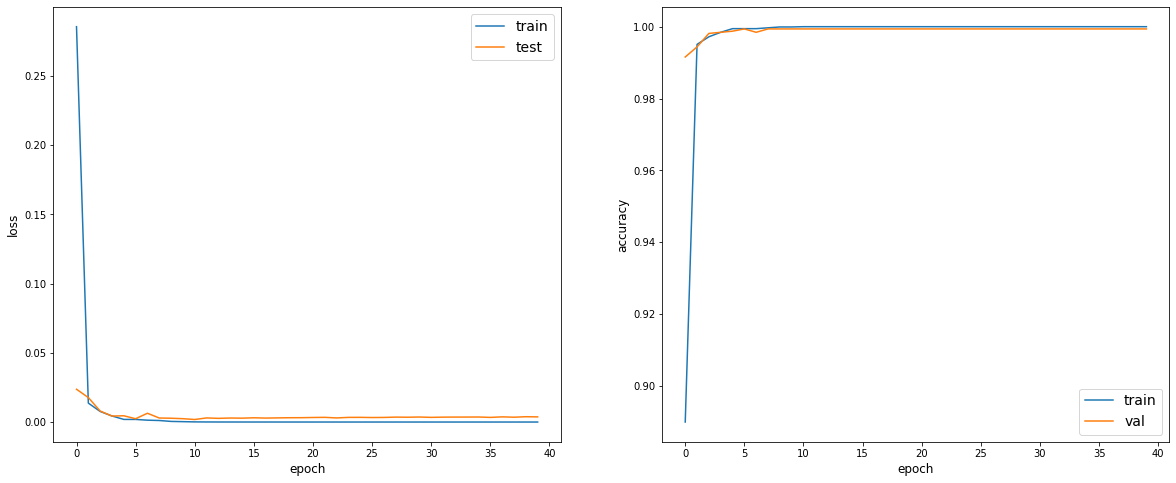

125/125 [==============================] - 1s 8ms/step - loss: 3.2412e-04 - binary_accuracy: 0.9998
test loss, test acc: [0.00032412257253770413, 0.99975]


In [17]:
# compiling the model
model4.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model4.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_4 = model4.evaluate(X_test, y_test)
print("test loss, test acc:", result_4)

# TRAINING MODEL 5

In [18]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 100, 100, 32)      288       
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 128)      

Epoch 1/40
100/100 [==============================] - 6s 58ms/step - loss: 0.2668 - binary_accuracy: 0.8742 - val_loss: 0.0188 - val_binary_accuracy: 0.9938
Epoch 2/40
100/100 [==============================] - 6s 56ms/step - loss: 0.0114 - binary_accuracy: 0.9964 - val_loss: 0.0058 - val_binary_accuracy: 0.9978
Epoch 3/40
100/100 [==============================] - 6s 56ms/step - loss: 0.0065 - binary_accuracy: 0.9973 - val_loss: 0.0029 - val_binary_accuracy: 0.9994
Epoch 4/40
100/100 [==============================] - 6s 57ms/step - loss: 0.0014 - binary_accuracy: 0.9995 - val_loss: 0.0024 - val_binary_accuracy: 0.9991
Epoch 5/40
100/100 [==============================] - 6s 56ms/step - loss: 0.0024 - binary_accuracy: 0.9992 - val_loss: 0.0032 - val_binary_accuracy: 0.9997
Epoch 6/40
100/100 [==============================] - 6s 57ms/step - loss: 4.7861e-04 - binary_accuracy: 0.9998 - val_loss: 0.0024 - val_binary_accuracy: 0.9997
Epoch 7/40
100/100 [==============================] - 

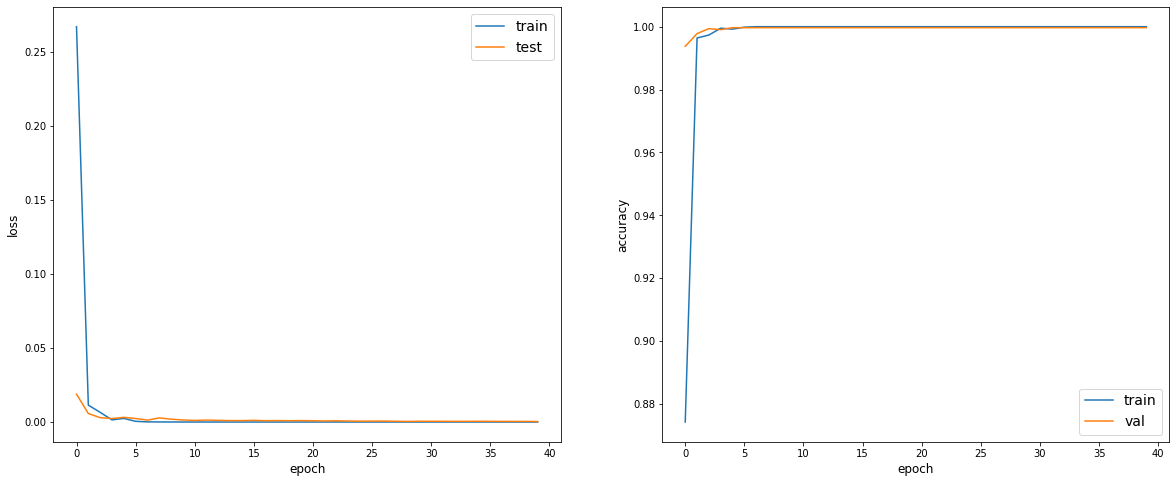

125/125 [==============================] - 1s 8ms/step - loss: 1.9865e-05 - binary_accuracy: 1.0000
test loss, test acc: [1.9865334422792248e-05, 1.0]


In [19]:
# compiling the model
model5.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model5.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_5 = model5.evaluate(X_test, y_test)
print("test loss, test acc:", result_5)

# TRAINING MODEL 6

In [20]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 100, 100, 32)      288       
                                                                 
 conv2d_21 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 25, 25, 128)      

Epoch 1/40
100/100 [==============================] - 6s 59ms/step - loss: 0.1240 - binary_accuracy: 0.9323 - val_loss: 0.0140 - val_binary_accuracy: 0.9941
Epoch 2/40
100/100 [==============================] - 6s 57ms/step - loss: 0.0117 - binary_accuracy: 0.9962 - val_loss: 0.0036 - val_binary_accuracy: 0.9984
Epoch 3/40
100/100 [==============================] - 6s 57ms/step - loss: 0.0034 - binary_accuracy: 0.9988 - val_loss: 0.0023 - val_binary_accuracy: 0.9994
Epoch 4/40
100/100 [==============================] - 6s 57ms/step - loss: 0.0023 - binary_accuracy: 0.9990 - val_loss: 0.0014 - val_binary_accuracy: 0.9994
Epoch 5/40
100/100 [==============================] - 6s 57ms/step - loss: 0.0018 - binary_accuracy: 0.9996 - val_loss: 0.0019 - val_binary_accuracy: 0.9994
Epoch 6/40
100/100 [==============================] - 6s 57ms/step - loss: 8.0631e-04 - binary_accuracy: 0.9999 - val_loss: 8.9412e-04 - val_binary_accuracy: 0.9994
Epoch 7/40
100/100 [==============================

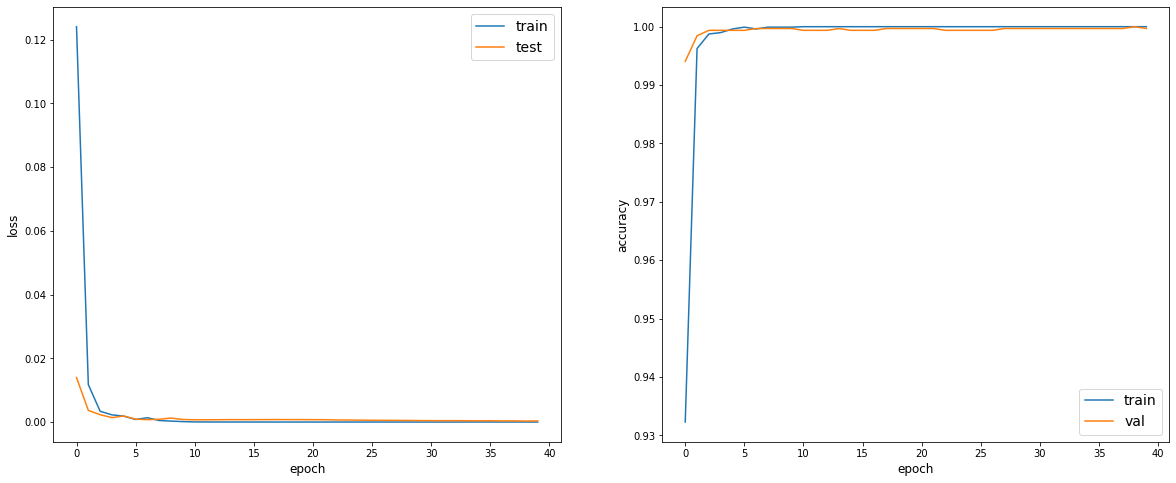

125/125 [==============================] - 1s 8ms/step - loss: 1.9065e-06 - binary_accuracy: 1.0000
test loss, test acc: [1.9064792015388247e-06, 1.0]


In [21]:
# compiling the model
model6.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model6.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_6 = model6.evaluate(X_test, y_test)
print("test loss, test acc:", result_6)